<a href="https://colab.research.google.com/github/Haripriya-2424/spotify-eda-analysis/blob/main/eda_spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive')

# Load CSV
file_path = '/content/drive/MyDrive/spotify_tracks.csv'
df = pd.read_csv(file_path)

#initial overview
print("Shape:", df.shape)
print("\nColumns:\n", df.columns.tolist())
print("\nSample Data:\n", df.head())
print("\nNull Values:\n", df.isnull().sum())

# Feature Engineering
df['duration_min'] = df['duration_ms'] / 60000
df['is_hit'] = (df['popularity'] >= 70).astype(int)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Shape: (62317, 22)

Columns:
 ['track_id', 'track_name', 'artist_name', 'year', 'popularity', 'artwork_url', 'album_name', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence', 'track_url', 'language']

Sample Data:
                  track_id                                  track_name  \
0  2r0ROhr7pRN4MXDMT1fEmd                  Leo Das Entry (From "Leo")   
1  4I38e6Dg52a2o2a8i5Q5PW                                AAO KILLELLE   
2  59NoiRhnom3lTeRFaBzOev      Mayakiriye Sirikiriye - Orchestral EDM   
3  5uUqRQd385pvLxC8JX3tXn    Scene Ah Scene Ah - Experimental EDM Mix   
4  1KaBRg2xgNeCljmyxBH1mo  Gundellonaa X I Am A Disco Dancer - Mashup   

                                         artist_name  year  popularity  \
0                         

# *Distribution of Song Popularity*

This histogram represents the distribution of song popularity scores across all tracks in the Spotify dataset. Popularity is measured on a scale from 0 to 100, where 100 represents the most popular songs on Spotify.

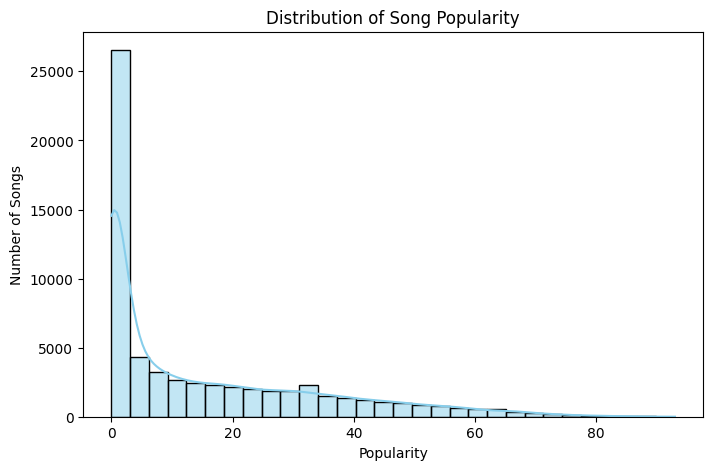

In [22]:
plt.figure(figsize=(8, 5))
sns.histplot(df['popularity'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Song Popularity")
plt.xlabel("Popularity")
plt.ylabel("Number of Songs")
plt.show()

# *Correlation Between Audio Features*
This heatmap visualizes the Pearson correlation coefficients between different audio features in the Spotify dataset — including how they relate to popularity.

Each square represents the strength and direction of the relationship between two features:

+1 = perfect positive correlation

-1 = perfect negative correlation

0 = no correlation

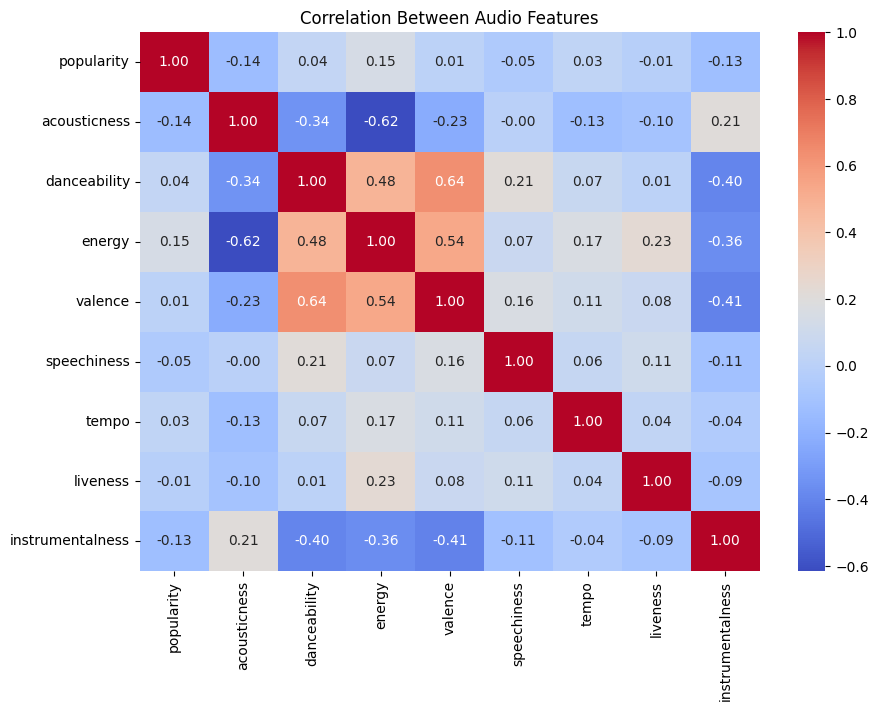

In [8]:
features = ['popularity', 'acousticness', 'danceability', 'energy', 'valence',
            'speechiness', 'tempo', 'liveness', 'instrumentalness']
plt.figure(figsize=(10, 7))
sns.heatmap(df[features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Audio Features")
plt.show()

# *Valence Distribution – Hits vs Non-Hits*
This violin plot compares the distribution of valence (i.e., how positive or happy a song sounds) between two categories:

0: Non-hit songs

1: Hit songs (typically defined by popularity ≥ 70)



/tmp/ipython-input-9-1284000662.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='is_hit', y='valence', palette='Set2')


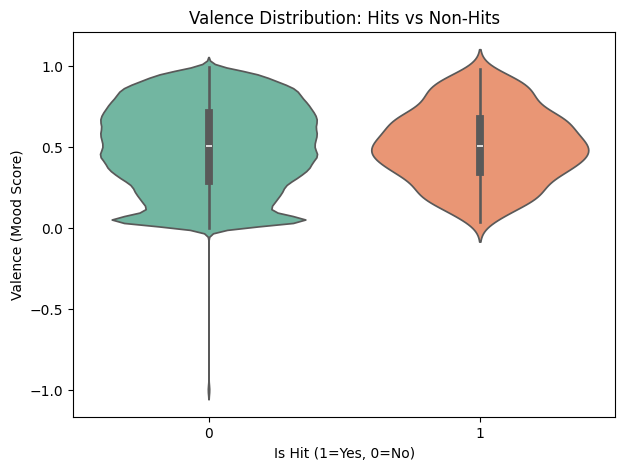

In [9]:
plt.figure(figsize=(7, 5))
sns.violinplot(data=df, x='is_hit', y='valence', palette='Set2')
plt.title("Valence Distribution: Hits vs Non-Hits")
plt.xlabel("Is Hit (1=Yes, 0=No)")
plt.ylabel("Valence (Mood Score)")
plt.show()

# *Trends in Energy and Valence Over Years*
 This line chart visualizes the average values of two key audio features:

Energy (blue): how intense and active a song feels

Valence (orange): how positive or happy a song sounds

plotted year-wise over time from 1970 to 2023.

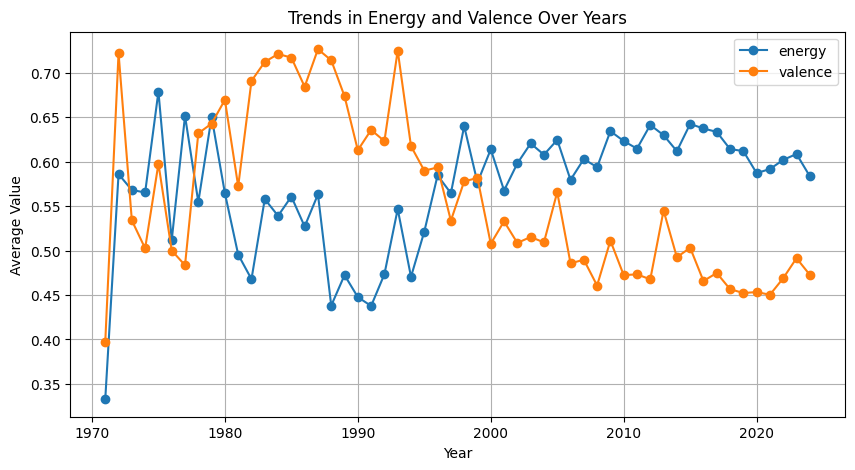

In [10]:
# 📈 4. Yearly Trends – Energy & Valence
yearly_trends = df.groupby('year')[['energy', 'valence']].mean()
yearly_trends.plot(figsize=(10, 5), marker='o')
plt.title("Trends in Energy and Valence Over Years")
plt.xlabel("Year")
plt.ylabel("Average Value")
plt.grid(True)
plt.show()

# *Danceability vs Popularity*
This scatter plot visualizes the relationship between a song’s danceability (x-axis) and its popularity (y-axis), with songs color-coded by whether they are a hit (is_hit = 1) or non-hit (is_hit = 0).

Danceability: A measure from 0 to 1 of how suitable a track is for dancing (based on tempo, rhythm stability, beat strength, etc.).

Popularity: Spotify's popularity score (0 to 100), where 100 is the most popular.

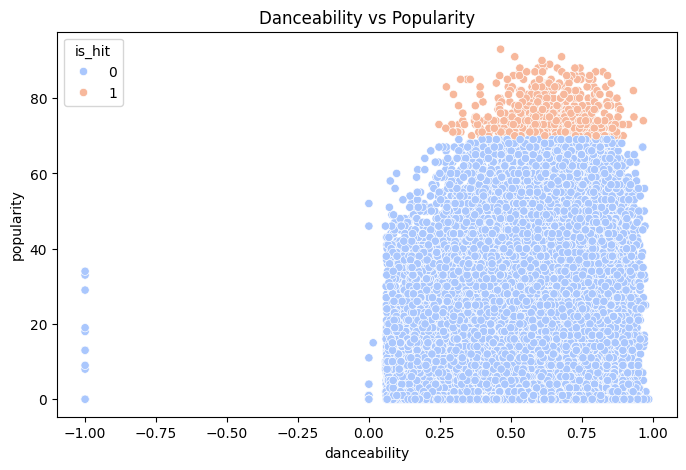

In [11]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='danceability', y='popularity', hue='is_hit', palette='coolwarm')
plt.title("Danceability vs Popularity")
plt.show()

# *Top 10 Artists by Average Popularity*
This horizontal bar chart displays the top 10 artists (or artist collaborations) based on their average track popularity in the Spotify dataset.

X-axis: Average popularity score (0–100) of each artist's songs.

Y-axis: Names of artists or artist combinations.

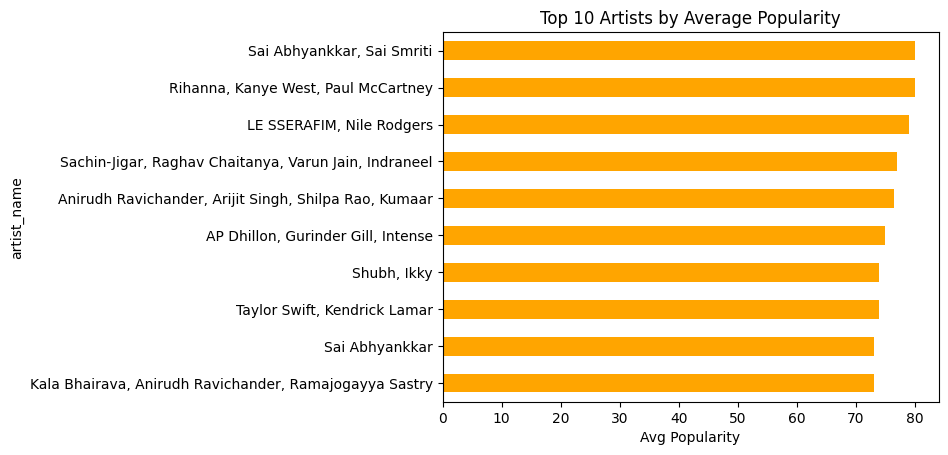

In [12]:
top_artists = df.groupby('artist_name')['popularity'].mean().sort_values(ascending=False).head(10)
top_artists.plot(kind='barh', color='orange')
plt.title("Top 10 Artists by Average Popularity")
plt.xlabel("Avg Popularity")
plt.gca().invert_yaxis()
plt.show()

# *Hit Ratio by Language (Top 10)*
This bar chart displays the hit ratio for the top 10 most impactful languages in the dataset.

X-axis: Language of the song

Y-axis: Hit ratio = (Number of hit songs in that language) ÷ (Total songs in that language)

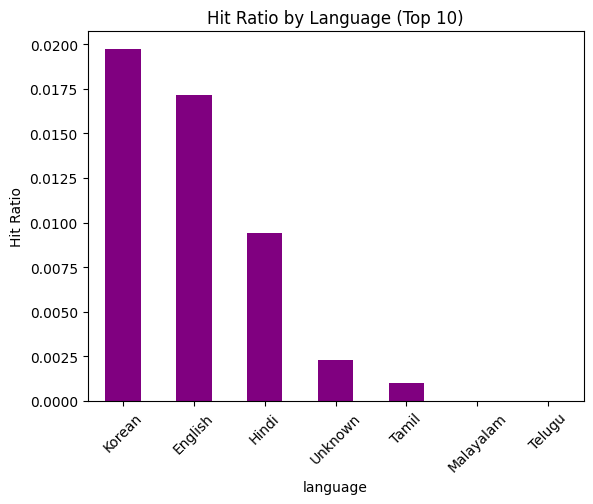

In [13]:
language_hits = df.groupby('language')['is_hit'].mean().sort_values(ascending=False).head(10)
language_hits.plot(kind='bar', color='purple')
plt.title("Hit Ratio by Language (Top 10)")
plt.ylabel("Hit Ratio")
plt.xticks(rotation=45)
plt.show()

#*Top 10 Most Active Artists*

This bar chart ranks the top 10 most prolific artists in the Spotify dataset based on the total number of songs they've released.

X-axis: Names of the artists

Y-axis: Number of songs attributed to each artist in the dataset



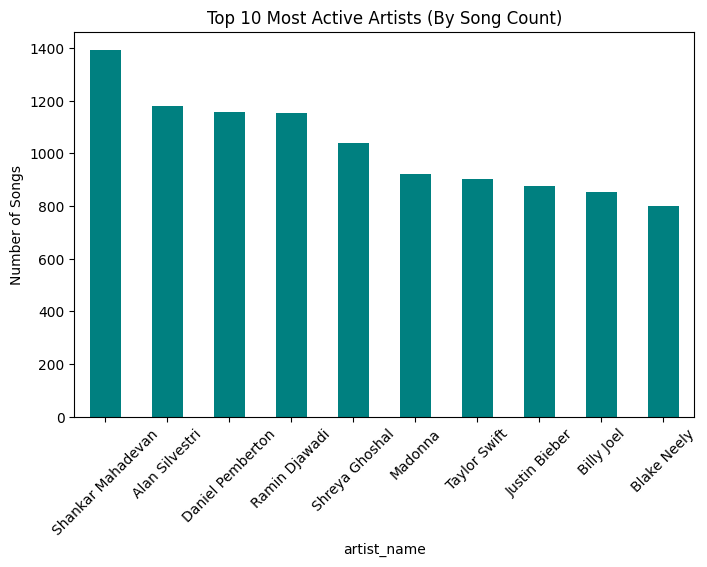

In [16]:
top_artists_count = df['artist_name'].value_counts().head(10)

plt.figure(figsize=(8, 5))
top_artists_count.plot(kind='bar', color='teal')
plt.title("Top 10 Most Active Artists (By Song Count)")
plt.ylabel("Number of Songs")
plt.xticks(rotation=45)
plt.show()


# *Popularity vs Duration*

This scatter plot visualizes the relationship between a song’s duration (in minutes) and its popularity, color-coded by whether the song is a hit (is_hit = 1) or non-hit (is_hit = 0).

X-axis: Duration of the song in minutes

Y-axis: Popularity score (0 to 100)

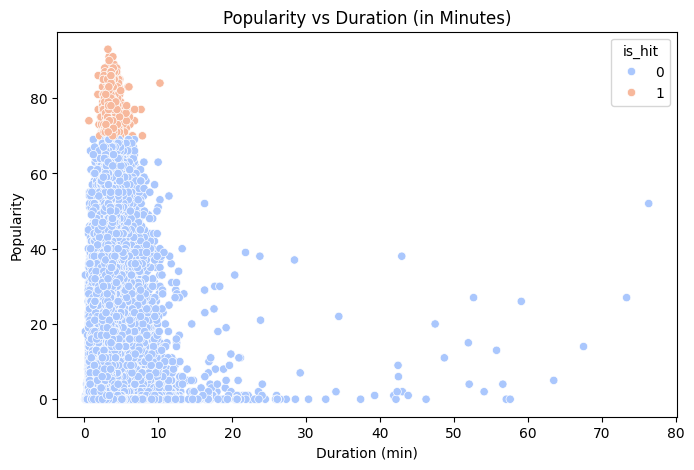

In [17]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['duration_min'], y=df['popularity'], hue=df['is_hit'], palette='coolwarm')
plt.title("Popularity vs Duration (in Minutes)")
plt.xlabel("Duration (min)")
plt.ylabel("Popularity")
plt.show()


# *Instrumentalness vs Popularity*

This scatter plot shows the relationship between a track’s instrumentalness score and its popularity, with color coding based on whether the song is a hit (is_hit = 1) or non-hit (is_hit = 0).

X-axis: Instrumentalness (ranges from 0 to 1 — higher means more instrumental)

Y-axis: Popularity score (0–100)

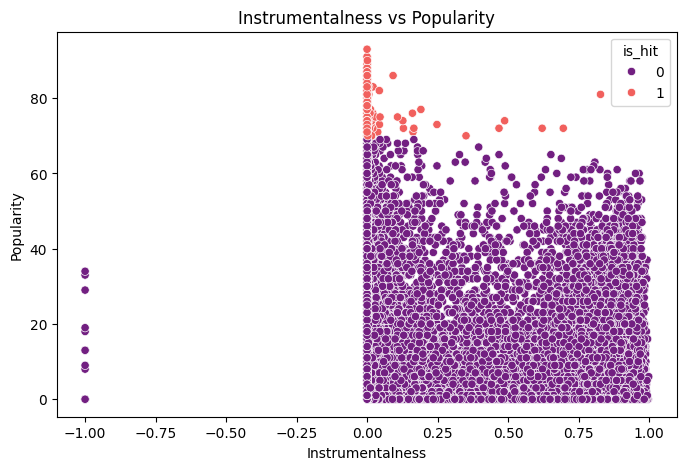

In [18]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='instrumentalness', y='popularity', data=df, hue='is_hit', palette='magma')
plt.title("Instrumentalness vs Popularity")
plt.xlabel("Instrumentalness")
plt.ylabel("Popularity")
plt.show()


# *Distribution of Musical Keys in Hits vs Non-Hits*

This grouped bar chart compares the distribution of musical keys across hit songs (is_hit = 1) and non-hit songs (is_hit = 0) in the dataset.

X-axis: Musical keys (C, C#, D, D#, ..., B)

Y-axis: Number of songs composed in each key


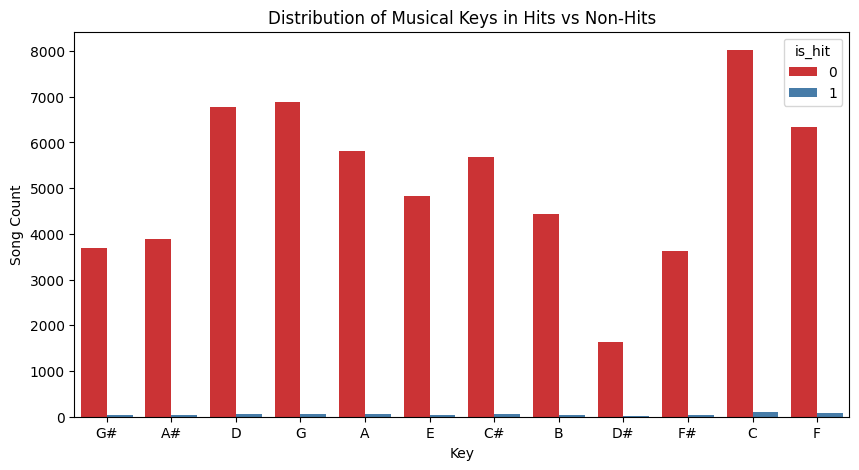

In [20]:
# Optional: map numeric keys to note names
key_mapping = {
    0: 'C', 1: 'C#', 2: 'D', 3: 'D#', 4: 'E', 5: 'F',
    6: 'F#', 7: 'G', 8: 'G#', 9: 'A', 10: 'A#', 11: 'B'
}
df['key_name'] = df['key'].map(key_mapping)

plt.figure(figsize=(10, 5))
sns.countplot(x='key_name', hue='is_hit', data=df, palette='Set1')
plt.title("Distribution of Musical Keys in Hits vs Non-Hits")
plt.xlabel("Key")
plt.ylabel("Song Count")
plt.show()


# *Number of Songs Released per Year*

This bar chart represents the volume of songs released each year from 1971 to 2024, based on the dataset.

X-axis: Year (1971–2024)

Y-axis: Number of songs released (count)

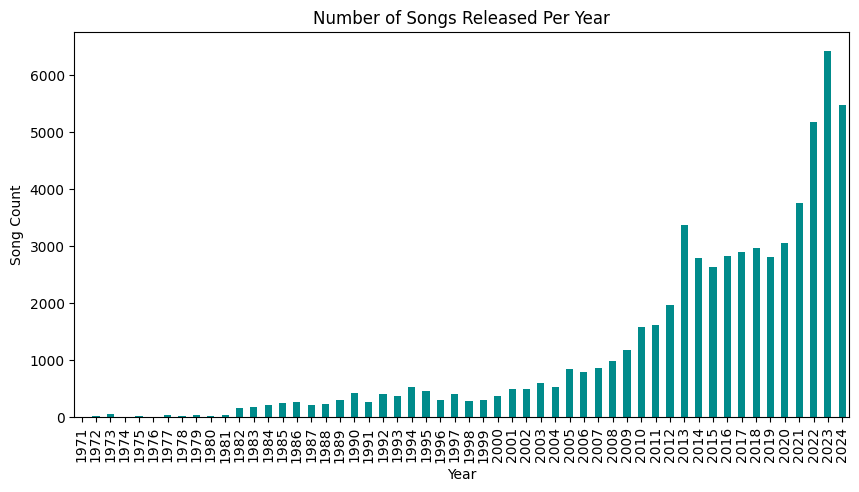

In [21]:
songs_per_year = df['year'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
songs_per_year.plot(kind='bar', color='darkcyan')
plt.title("Number of Songs Released Per Year")
plt.xlabel("Year")
plt.ylabel("Song Count")
plt.show()
